# Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow, 2nd Edition

## by Aurelien Geron

### Notes by Melis Tekant

## Chapter 4: Training Models

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
import seaborn as sns

Covered in this chapter: Linear Regression (using closed form equation to compute best fit, as well as Gradient Descent), Polynomial Regression (learning curves and regularization techniques to avoid overfitting). 

Linear Regression:

$$\hat y = \theta_0 + \theta_1 X_1 + \theta_2 X_2 + ... + \theta_n X_n$$

where the intercept $\theta_0$ is called the bias term and $\theta_i$'s model parameters.

In vectorized form, this equation can be expressed as $\hat y = \boldsymbol{\theta \cdot x}$, where $\boldsymbol{\theta}$ is the parameter vector and $\boldsymbol{x}$ is the feature vector. 

$\boldsymbol{\theta \cdot x}$ can equivalently be expressed by $h_{\boldsymbol{\theta}}(\boldsymbol{x})$ where $h_{\boldsymbol{\theta}}$ is the hypothesis function.

In training the regression model, the aim is to find $\boldsymbol{\theta}$ such that the MSE (or another cost function) is minimized. 

$$MSE(\boldsymbol{X}, h_{\theta}) = MSE(\boldsymbol{
\theta}) = \frac{1}{m} \sum_{i=1}^m (\boldsymbol{\theta}^T \boldsymbol{x}^{(i)}-y^{(i)})^2 $$

To find $\boldsymbol{\theta}$, the normal equation is used: 

$$\boldsymbol{\hat \theta} = (\boldsymbol{X^T X})^{-1} \boldsymbol{X}^T \boldsymbol{y}. $$

Original Equation
y =  4 +  6 x
Linear fit using normal equation
y_approx =  [4.15] +  [6.07] x
Linear fit using sklearn Linear Model
y_approx =  [4.15] +  [[6.07]] x


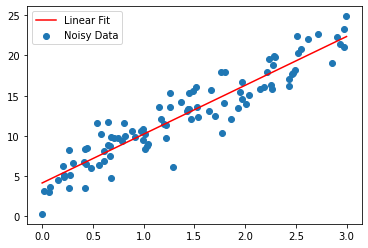

In [54]:
# Generating noisy linear data

xrange = 3
X = xrange * np.random.rand(100,1)

noise_coeff = 2
intercept = 4
slope = 6
y = intercept + slope * X + noise_coeff * np.random.randn(100,1)

plt.scatter(X,y,label ='Noisy Data')

Xarr = np.c_[np.ones((len(X),1)),X]
theta_hat = np.linalg.inv(Xarr.T.dot(Xarr)).dot(Xarr.T).dot(y)

print('Original Equation')
print('y = ', intercept, '+ ', slope,'x')
print('Linear fit using normal equation')
print('y_approx = ', np.round(theta_hat[0],2), '+ ', np.round(theta_hat[1],2),'x')
print('Linear fit using sklearn Linear Model')

from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(X,y)

print('y_approx = ', np.round(linear.intercept_,2), '+ ', np.round(linear.coef_,2),'x')


Xpred = np.linspace(0,xrange,100)
Xpred = np.c_[np.ones((len(Xpred),1)),Xpred]
ypred = Xpred.dot(theta_hat)

plt.plot(Xpred[:,1],ypred,'r',label='Linear Fit')
plt.legend();

In [60]:
#Can also directly call least squares (svd stands for singular value decomposition):

theta_hat_svd, residuals, rank, s = np.linalg.lstsq(Xarr, y, rcond = 1e-6)
np.round(theta_hat_svd,2)

array([[4.15],
       [6.07]])

In [59]:
# Or use the pseudoinverse of X

np.round(np.linalg.pinv(Xarr).dot(y),2)

array([[4.15],
       [6.07]])

Using the pseudoinverse instead of the normal equation is computationally more efficient, and does not crash in the case that $\bf{X^T X}$ is not computable. This method also scales by O($n^2$), where n is the number of features, as opposed to ~O($n^3$) for the normal equation. Both scale linearly with respect to the number of datapoints. 

Gradient Descent: 

Generic optimization algorithm. $\boldsymbol{\hat \theta}$ is initialized with random values. The algorithm calculates the gradient of the error function with respect to $\boldsymbol{\hat \theta}$ and moves in the direction of maximal descent. It stops when the gradient is zero.

The step size, or the learning rate can be tweaked to attain minimal number of iterations until convergence. 

The cost function might not be a simple convex function, which can also create issues with convergence, but the MSE for linear regression model is a continuous, convex function in the parameter space, which ensures no discontinuities in slope and a global minimum without any local minima. 

If the individual features have vastly different scales, the gradient descent algorithm can also require many steps to converge, thus all features should be scaled to optimize convergence. Scikit-Learn's StandardScaler can be used for this purpose. 

Batch Gradient Descent:

Take partial derivatives of the cost function w.r.t. each parameter. This can be done in a single equation via:

$$\nabla_{\theta_j} MSE(\boldsymbol{\theta}) = \frac{\partial}{\partial \theta_j}MSE(\boldsymbol{\theta}) = \frac{2}{m}\sum_{i=1}^m(\boldsymbol{\theta^T x}^{(i)} - y^{(i)}) x_j^{(i)}$$

and the entire vector of the gradients can be expressed by the expression $\nabla_{\theta} MSE(\boldsymbol{\theta})$. 

The $\boldsymbol{\theta}$ to be used in the next iteration is then

$\boldsymbol{\theta}^{next} = \boldsymbol{\theta}^{previous} -\eta \nabla_{\theta} MSE(\boldsymbol{\theta}).$


This method is computationally expensive for large datasets, but scales well with the number of features, so better to use Gradient Descent than the normal equation or SVD decomposition.



In [63]:
eta = 0.1
n_iter = 1000
m = 100
theta = np.random.randn(2,1)

for iter in range(n_iter):
    grad = 2/m * Xarr.T.dot(Xarr.dot(theta)-y)
    theta = theta - eta * grad
    
np.round(theta,2)

array([[4.15],
       [6.07]])

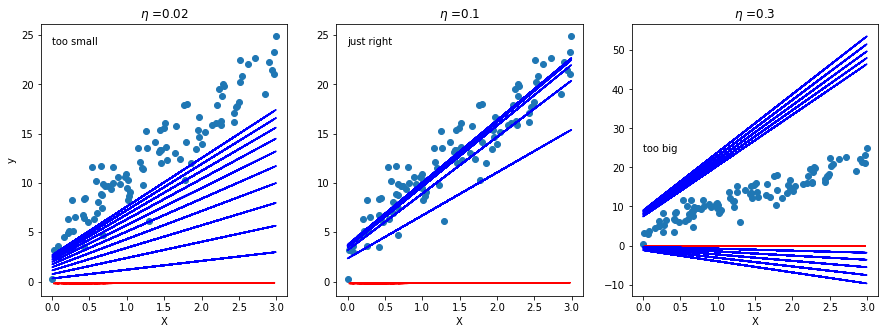

In [93]:
etas = [0.02,0.1,0.3]
n_iter = 10
comments = ['too small','just right','too big']

theta_0 = np.random.randn(2,1)

plt.subplots(figsize=(15,5))

for i in range(len(etas)):
    theta = theta_0
    eta = etas[i]
    plt.subplot(1,3,i+1)
    plt.scatter(X,y)
    plt.plot(X,theta[0]+theta[1]*X,'r--')
    plt.title(('$\eta$ =' +str(eta)))
    plt.xlabel('X')
    plt.text(0, 24, comments[i])
    if i==0:
        plt.ylabel('y')
    for iter in range(n_iter):
        grad = 2/m * Xarr.T.dot(Xarr.dot(theta)-y)
        theta = theta - eta * grad
        plt.plot(X,theta[0]+theta[1]*X,'b')
        
    

Grid search can be used to find an appropriate learning rate.

To optimize computing time, when running the algorithm, the number of iterations can be set high but the search can be interrupted when the norm of the gradient vector $< \epsilon$. 

Stochastic Gradient Descent: 

Takes a random point from the training set and compute the gradient based on only that point. This makes the algorithm quite jumpy, and it may never fully settle to the final optimal location, but it is very fast and can be used to train models for very large datasets. 

For cost functions that may have local minima, SGD is a better fit, since it can jump out of shallow local minima and find the global minimum. 

One way around the 'jumpiness' issue is to gradually lower the learning rate (set a learning schedule). 

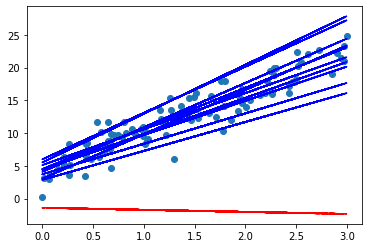

In [112]:
n_epochs = 10
t0, t1 = 5, 40
theta = np.random.randn(2,1)
plt.scatter(X,y)
plt.plot(X,theta[0]+theta[1]*X,'r--')
for epoch in range(n_epochs):
    for i in range(m):
        schedule = t0/(epoch+t1)
        random_index = np.random.randint(m)
        xi = Xarr[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta) - yi)
        theta = theta - schedule*gradients
    plt.plot(X,theta[0]+theta[1]*X,'b')

In [117]:
# Using scikit-learn,

from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(max_iter=1000,tol=1e-3,penalty=None,eta0=0.1)
sgd.fit(X,y.ravel())
np.round(sgd.intercept_,2), np.round(sgd.coef_,2)

(array([4.15]), array([6.05]))

Mini-Batch Gradient Descent:

In between the two methods described above(batch and stochastic gradient descent), this method takes a few random instances at every step (mini-batches), which results in less erratic descent than SGD, and a closer approach to the minimum, but it may not be able to escape local minima as well as SGD. 

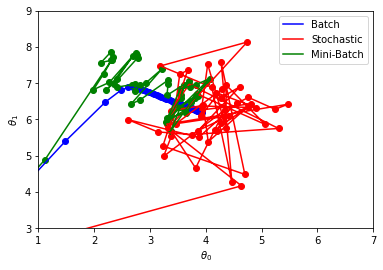

In [226]:
# Paths for batch, mini-batch, and stochastic gradient descents in parameter space.

eta = 0.1
n_iter = 50
m=100
t0, t1 = 5, 40
mb_size=3

theta_0 = np.random.randn(2,1)
theta_bgd_ins = theta_0
theta_sgd_ins = theta_0
theta_mbgd_ins = theta_0
theta_bgd = theta_bgd_ins
theta_sgd = theta_sgd_ins
theta_mbgd = theta_mbgd_ins

for iter in range(n_iter):
    #Batch GD
    grad = 2/m * Xarr.T.dot(Xarr.dot(theta_bgd_ins)-y)
    theta_bgd_ins = theta_bgd_ins - eta * grad
    theta_bgd = np.append(theta_bgd, theta_bgd_ins,axis=1)
    #Stoachastic GD
    schedule = t0/(iter+t1)
    for i in range(m):
        random_index = np.random.randint(m)
        xi = Xarr[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta_sgd_ins) - yi)
        theta_sgd_ins = theta_sgd_ins - schedule*gradients
    theta_sgd = np.append(theta_sgd,theta_sgd_ins,axis=1)
    #Mini-Batch GD   
    mbd_indexes = np.random.randint(m,size = mb_size)
    X_mb = Xarr[mbd_indexes]
    y_mb = y[mbd_indexes]
    grad = 2/mb_size * X_mb.T.dot(X_mb.dot(theta_mbgd_ins)-y_mb)
    theta_mbgd_ins = theta_mbgd_ins - eta * grad
    theta_mbgd = np.append(theta_mbgd, theta_mbgd_ins,axis=1)

plt.plot(theta_bgd[0],theta_bgd[1],'b-',label='Batch')
plt.scatter(theta_bgd[0],theta_bgd[1],color='blue')
plt.plot(theta_sgd[0],theta_sgd[1],'r-',label='Stochastic')
plt.scatter(theta_sgd[0],theta_sgd[1],color='red')
plt.plot(theta_mbgd[0],theta_mbgd[1],'g-',label='Mini-Batch')
plt.scatter(theta_mbgd[0],theta_mbgd[1],color='green')
plt.xlim([1,7])
plt.ylim([3,9])
plt.ylabel('$ \\theta_1 $')
plt.xlabel('$ \\theta_0 $')
plt.legend();

    


Polynomial Regression: 

Let's use a linear model to fit nonlinear data, for those cases where the trend is more complex than a straight line.

Original Equation
y =  4 +  2 x +  2 x**2
Linear Regression using polynomial features
y_approx =  7.73 +  2.11 x +  2.07 x**2


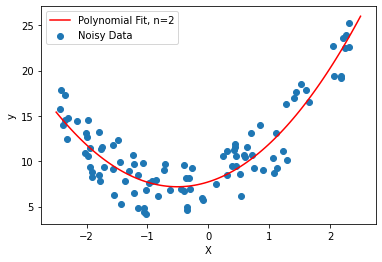

In [287]:
m = 100
xrange = 5
a = 2
b = 2
inter = 4
noise = 7

X = xrange * np.random.rand(m,1) - xrange/2
y = a * X**2 + b * X + inter + noise * np.random.rand(m,1)

plt.scatter(X,y,label = 'Noisy Data')

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly.fit_transform(X)
linear = LinearRegression()
linear.fit(X_poly,y)
print('Original Equation')
print('y = ', inter, '+ ', b,'x + ',a, 'x**2')
print('Linear Regression using polynomial features')
print('y_approx = ', np.round(float(linear.intercept_),2), '+ ', np.round(linear.coef_[0][0],2),'x + ',np.round(linear.coef_[0][1],2),'x**2')

X_pred = np.linspace(-xrange/2,xrange/2,100)
X_pred = X_pred.reshape(-1,1)
X_pred_poly = poly.fit_transform(X_pred)
y_pred = linear.predict(X_pred_poly)

plt.plot(X_pred,y_pred,'r',label = 'Polynomial Fit, n=2')
plt.xlabel('X')
plt.ylabel('y')
plt.legend();


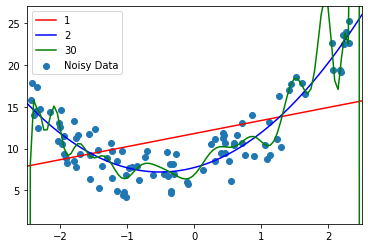

In [291]:
n_feats = [1, 2, 30]
cs = ['r','b','g']

plt.scatter(X,y,label = 'Noisy Data')

for i in range(len(n_feats)):
    feat = n_feats[i]
    poly = PolynomialFeatures(degree = feat, include_bias = False)
    X_poly = poly.fit_transform(X)
    linear = LinearRegression()
    linear.fit(X_poly,y)
    X_pred_poly = poly.fit_transform(X_pred)
    y_pred = linear.predict(X_pred_poly)
    plt.plot(X_pred,y_pred,cs[i],label = feat)
plt.legend()    
plt.xlim((-2.5,2.5))
plt.ylim(1,27);

It is clear that n=1 underfits and n=30 overfits the data in this case. How can we know what is the correct n value for a particular dataset? 

Perform cross-validation. If model does well on training, but poorly on test, then overfitting.
If model does poorly on both training and test, then underfitting.

Another method: learning curves, which are plots that show the model's performance on training and validation sets, as a function of the training set size (or iteration). 

Train the model several times on different sized subsets of the training set. 

In [298]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model,X,y):
    X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.25)
    train_errors, val_errors = [],[]
    for m in range(1,len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
        val_errors.append(mean_squared_error(y_val,y_val_predict))
    plt.plot(np.sqrt(train_errors),'r',linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors),'b',linewidth=3, label='val')

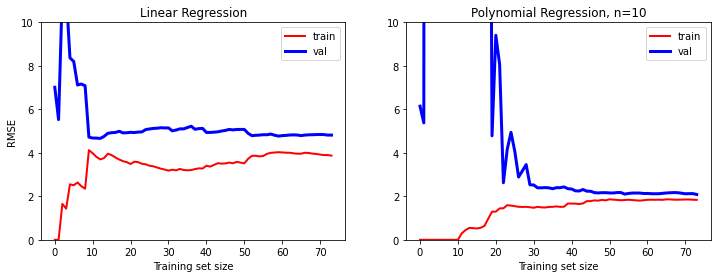

In [324]:
plt.subplots(figsize=(12,4))
plt.subplot(1,2,1)
lin = LinearRegression()
plot_learning_curves(lin,X,y)
plt.ylim(0,10)
plt.legend()
plt.ylabel('RMSE')
plt.xlabel('Training set size')
plt.title('Linear Regression')

plt.subplot(1,2,2)

poly = PolynomialFeatures(degree = 10, include_bias = False)
X_poly = poly.fit_transform(X)
lin2 = LinearRegression()
plot_learning_curves(lin2,X_poly,y)
plt.xlabel('Training set size')
plt.title('Polynomial Regression, n=10')
plt.ylim(0,10)
plt.legend();


Bias-variance trade-off: The more complex a model is, the more its variance, but the less bias it will have, thus when selecting a model, the bias-variance trade-off needs to be taken into account. (For more information on this, check out my notes on the excellent textbook, Introduction to Statistical Learning.)

Regularized Linear Models:

Constraining a model in order to avoid overfitting is called 'regularizing'. For linear models, the constraining is performed on the weights. Some ways to regularize models: Ridge Regression, Lasso Regression, and Elastic Net.

Ridge Regression (Tikhonov regularization):

The cost function is altered to be as follows:

$J(\boldsymbol{\theta}) = MSE(\boldsymbol{\theta})+\alpha\frac{1}{2}\sum_{i=1}^n \theta_i^2,$

which has the closed form solution of:

$$\boldsymbol{\hat \theta} = (\boldsymbol{X^T X} + \alpha \boldsymbol{A})^{-1} \boldsymbol{X} ^T \boldsymbol{y}$$

where $\alpha$ is the hyperparameter that controls the weight of regularization, and $\bf{A}$ is an identity matrix of size (n+1) x (n+1), save for the top left cell (bias term), which is 0. 

The Ridge Regression cost function should be used during training, but the model's performance should be evaluated via the unregularized performance measure, such as precision/recall. Data should be scaled before Ridge Regression is performed.



In [383]:
m = 20
xrange = 5
a = 0.2
b = 1
inter = 2
noise = 15

X = xrange * np.random.rand(m,1)
y = a * X**2 + b * X + inter + noise * np.random.rand(m,1)

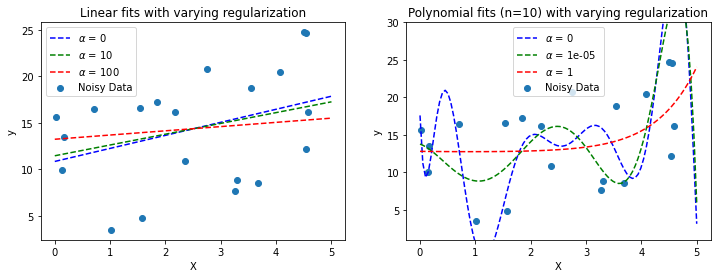

In [384]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

Xpred = np.linspace(0,xrange,100)
Xpred = Xpred.reshape(-1,1)
poly = PolynomialFeatures(degree=10)
scaler = StandardScaler()
X_poly = poly.fit_transform(X)
X_poly_scale = scaler.fit_transform(X_poly)
X_pred_poly = poly.fit_transform(Xpred)
X_pred_poly_scale = scaler.fit_transform(X_pred_poly)

alphas = [0,10,100]
alphas2 = [0,1e-5,1]
cs = ['b--','g--','r--']

plt.subplots(figsize=(12,4))
plt.subplot(1,2,1)
plt.scatter(X,y,label = 'Noisy Data')
plt.xlabel('X')
plt.ylabel('y')
for i in range(len(alphas)):
    alp = alphas[i]
    ridge = Ridge(alpha=alp, solver = 'cholesky')
    ridge.fit(X,y)
    ypred = ridge.predict(Xpred)
    plt.plot(Xpred,ypred,cs[i],label = str('$\\alpha$ = '+str(alp)))
plt.legend()
plt.title('Linear fits with varying regularization')

plt.subplot(1,2,2)
plt.scatter(X,y,label = 'Noisy Data')
plt.xlabel('X')
plt.ylabel('y')

for i in range(len(alphas2)):
    alp = alphas2[i]
    ridge = Ridge(alpha=alp, solver = 'cholesky')
    ridge.fit(X_poly_scale,y)
    ypred = ridge.predict(X_pred_poly_scale)
    plt.plot(Xpred,ypred,cs[i],label = str('$\\alpha$ = '+str(alp)))
plt.legend()
plt.title('Polynomial fits (n=10) with varying regularization')
plt.ylim(1,30);


Lasso Regression: 

Least absolute shrinkage and selection operator (Lasso) regression. Similar to Ridge Regression, but uses $\ell_1$ norm instead of $\ell_2$.

$J(\boldsymbol{\theta}) = MSE(\boldsymbol{\theta})+\alpha\sum_{i=1}^n |\theta_i|$

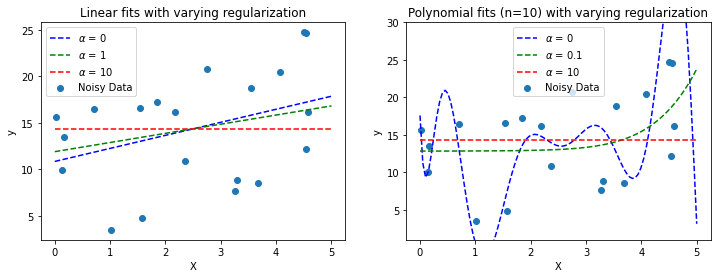

In [397]:
from sklearn.linear_model import Lasso

alphas = [0,1,10]
alphas2 = [0,0.1,10]

plt.subplots(figsize=(12,4))
plt.subplot(1,2,1)
plt.scatter(X,y,label = 'Noisy Data')
plt.xlabel('X')
plt.ylabel('y')
for i in range(len(alphas)):
    alp = alphas[i]
    if alp == 0:
        linear = LinearRegression()
        linear.fit(X,y)
        ypred = linear.predict(Xpred)
    else:
        lasso = Lasso(alpha=alp)
        lasso.fit(X,y)
        ypred = lasso.predict(Xpred)
    plt.plot(Xpred,ypred,cs[i],label = str('$\\alpha$ = '+str(alp)))
plt.legend()
plt.title('Linear fits with varying regularization')

plt.subplot(1,2,2)
plt.scatter(X,y,label = 'Noisy Data')
plt.xlabel('X')
plt.ylabel('y')

for i in range(len(alphas2)):
    alp = alphas2[i]
    if alp == 0:
        linear = LinearRegression()
        linear.fit(X_poly_scale,y)
        ypred = linear.predict(X_pred_poly_scale)
    else: 
        lasso = Lasso(alpha=alp)
        lasso.fit(X_poly_scale,y)
        ypred = lasso.predict(X_pred_poly_scale)
    plt.plot(Xpred,ypred,cs[i],label = str('$\\alpha$ = '+str(alp)))
plt.legend()
plt.title('Polynomial fits (n=10) with varying regularization')
plt.ylim(1,30);


In [ ]:
#Figure 4-19 on page 141 goes here:


# Unregularized MSE cost function



#Batch Gradient Descent path for unregularized MSE cost function




Elastic Net:

Elastic Net is a mix between Ridge and Lasso Regressions, with a parameter (r) which can be tuned to control the 'mix ratio'. 

The Elastic Net cost function can be expressed as: 

$J(\boldsymbol{\theta}) = MSE(\boldsymbol{\theta})+\alpha\frac{1-r}{2}\sum_{i=1}^n \theta_i^2 + r \alpha\sum_{i=1}^n |\theta_i|$